### Date Sorting
Before correlating data and stock prices, each entry will be grouped by post date and the average sentiment score for that date will be used. Other columns are dropped as they become unnecessary by this point.

In [25]:
import pandas

df = pandas.read_csv('data/sentiment_data.csv')
df['Date'] = pandas.to_datetime(df['Date'])
df = df.groupby('Date')['Sentiment'].mean().reset_index()

df

,Date,Sentiment
0,2024-01-12,0.385000
1,2024-01-13,0.330600
2,2024-01-14,0.922400
3,2024-01-15,0.739900
4,2024-01-16,0.047489
...,...,...
312,2025-01-07,0.475600
313,2025-01-08,0.916950
314,2025-01-09,0.520600
315,2025-01-10,0.099200


### Adding Stock Price Data
Next, TSLA stock price data is imported from 1/12/2024 to 1/11/2025. Since the closing price is the only one necessary for this use case, the other data will be dropped, and the closing price will be appended onto a post entry with the matching date.

In [26]:
priceDf = pandas.read_csv('data/tsla_price_data.csv')
priceDf['Date'] = priceDf['Date'].str.replace('/', '-')
priceDf['Date'] = pandas.to_datetime(priceDf['Date'])

priceDf = priceDf.drop(columns=['Open', 'High', 'Low', 'Volume'], axis=1)
priceDf = priceDf.set_index('Date')
priceDf

,Close
Date,
2025-01-17,426.50
2025-01-16,413.82
2025-01-15,428.22
2025-01-14,396.36
2025-01-13,403.31
...,...
2024-01-23,209.14
2024-01-22,208.80
2024-01-19,212.19


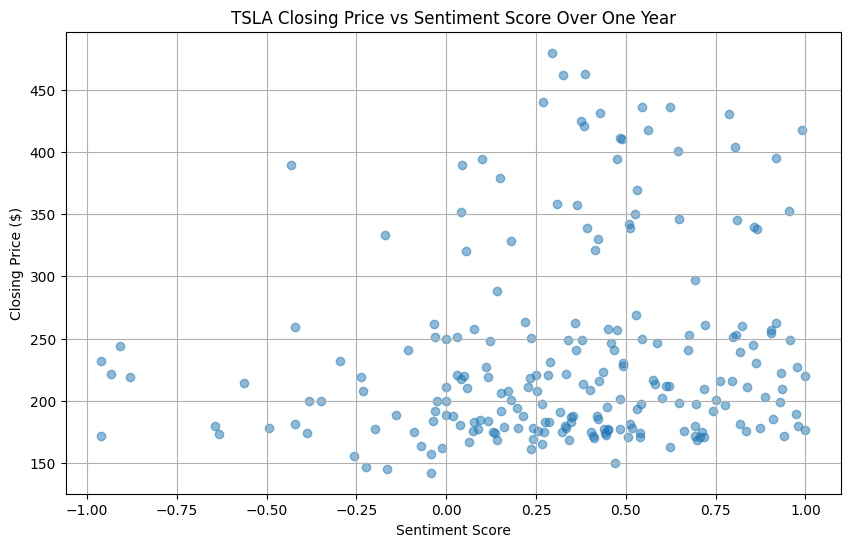

In [27]:
import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots()

df.set_index('Date', inplace=True)

merged_df = pandas.merge(priceDf, df, on='Date')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Sentiment'], merged_df['Close'], alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Closing Price ($)')
plt.title('TSLA Closing Price vs Sentiment Score Over One Year')
plt.grid(True)
plt.show()

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Closing Price ($)', color='tab:blue')
# ax1.plot(priceDf.index, priceDf['Close'], color='tab:blue', label='Closing Price ($)')
# ax1.tick_params(axis='y', labelcolor='tab:blue')

# ax2 = ax1.twinx()
# ax2.set_ylabel('Sentiment Score', color='tab:red')
# ax2.plot(df.index, df['Sentiment'], color='tab:red', label='Sentiment Score')
# ax2.tick_params(axis='y', labelcolor='tab:red')

# plt.title('TSLA Closing Price and Sentiment Score Over One Year')
# fig.tight_layout()
# plt.show()